#                               K MEANS CLUSTERING EXAMPLE

In [4]:
# dependencies 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# we will deploy a number of nodes each having a 2 feature X and Y
# on this data we will run the K means clustering algorithm

In [6]:
# number of points in the 2 D space 
number_points = 4
number_points = np.random.randint(low = 10, high = 100, size =1)   # assigning the random number of points
print(number_points[0])

# position matrix will store the X and the Y co-ordinate of the points
position = np.zeros(shape=(number_points[0],2))
#assigning the X and Y co-ordinate to each individual points
i=0
while i <number_points[0]:
    position[i][0] = np.random.randint(low = 5, high = 100, size =1)[0]
    position[i][1] = np.random.randint(low = 5, high = 100, size =1)[0]
    i = i + 1
print(position)


69
[[ 47.  18.]
 [ 18.  16.]
 [ 45.  36.]
 [ 95.  76.]
 [ 39.  90.]
 [ 41.  79.]
 [ 35.  60.]
 [ 44.  15.]
 [ 79.  44.]
 [ 26.  80.]
 [ 64.  15.]
 [ 19.  73.]
 [ 84.  82.]
 [ 56.  85.]
 [ 92.  57.]
 [ 35.  61.]
 [ 69.  18.]
 [ 26.  23.]
 [ 32.  24.]
 [ 10.  67.]
 [ 18.  35.]
 [ 32.  97.]
 [ 21.  55.]
 [ 43.  15.]
 [  8.   9.]
 [ 39.  19.]
 [ 71.  16.]
 [ 56.  92.]
 [ 92.   7.]
 [ 66.  13.]
 [ 85.  78.]
 [ 41.  36.]
 [ 36.   8.]
 [ 96.   8.]
 [ 28.   7.]
 [ 28.  55.]
 [ 52.  37.]
 [ 95.  59.]
 [ 63.  28.]
 [ 78.  87.]
 [ 29.  28.]
 [ 45.  79.]
 [ 10.  80.]
 [ 55.  16.]
 [ 97.  83.]
 [ 33.  10.]
 [ 38.  98.]
 [ 50.  39.]
 [ 14.  72.]
 [ 15.  78.]
 [ 57.  14.]
 [ 56.  82.]
 [ 23.  36.]
 [ 94.  49.]
 [ 36.  46.]
 [ 54.  79.]
 [ 57.  50.]
 [ 88.  16.]
 [  8.  81.]
 [ 53.  16.]
 [ 26.   9.]
 [ 80.  88.]
 [ 86.  28.]
 [ 13.   9.]
 [ 26.  37.]
 [ 97.  18.]
 [ 24.   9.]
 [ 90.  70.]
 [ 92.  40.]]


In [7]:
# now we will plot these points using matplotlib to get a better understanding 
i = 0
plt.title('deployment of nodes in the space')
plt.ylabel('y co-ordinate')
plt.xlabel('x co-ordinate')
fig,ax = plt.subplots()
while i<number_points[0]:
    ax.scatter([position[i][0]],[position[i][1]], color='blue')
    i = i + 1
fig
plt.close('all')

[[ 92.  40.]
 [ 92.   7.]
 [ 29.  28.]]


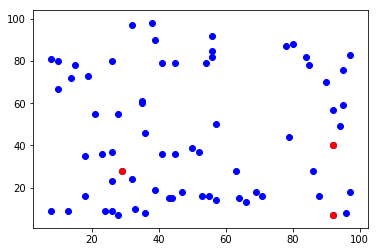

In [8]:
# start of K means clustering algorithm

# number of clusters we want to divide the the whole plot of points into
# you are free to change the value of  K
k = 3
if(k > number_points[0]):
    print('number of clusters cannot be greater than the no of points itself')
    exit(0)

# now we will have K centroid
centroid = np.zeros(shape=(k,2))

# randomly allocating the value of the centroid array
i = 0
while i<k:
    point = np.random.randint(low = 0, high = number_points[0], size =1)[0]
    centroid[i][0] = position[point][0]
    centroid[i][1] = position[point][1]
    ax.scatter([centroid[i][0]],[centroid[i][1]], color='red')
    i = i +1

print(centroid)
# centroid in the map is shown as red points
fig
# here we will have K no of overlapping red and blue points 

In [9]:
# now we will have to assign each of the point to a paticular cluster 
# we can have at most K no of clusters so 
# assign array will have this mapping and each value will be between 1 to K
assign = np.zeros(shape=(number_points[0],1))
loops = 1000
while loops >0:
    i =0
    j =0
    while i<number_points[0]:
        minimum = 100000
        elem = 0
        while j<k:
            dis = (position[i][0] - centroid[j][0])**2  + (position[i][1] - centroid[j][1])**2 
            dis = np.sqrt(dis)
            if  dis < minimum:
                minimum = dis
                elem = int(j+1)
            j = j +1
        assign[i] = elem
        j = 0
        i = i +1
    # now re evaluating the centroid 
    i = 0
    j =0 
    while i<k:
        count = 0
        x_or=0
        y_or=0
        while j<number_points[0]:
            a = (int)(assign[j][0])
            b = (int)(i+1)            
            if a == b:
                x_or = x_or + position[j][0]
                y_or = y_or + position[j][1]
                count = count +1 
            j = j +1
        if count != 0:
            x_or = np.floor(x_or/count)
            y_or = np.floor(y_or/count)
        centroid[i][0] = x_or
        centroid[i][1] = y_or
        j= 1
        i = i +1
    loops  = loops -1
# now we will see which of the points is assigned to which of the cluster        

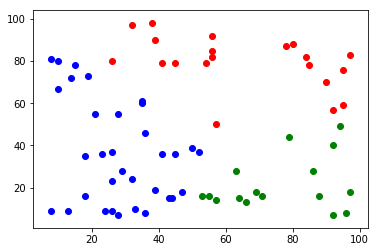

In [10]:
#graph plot 

#clearing the plots
plt.clf()
        
plt.title('deployment of nodes in the space')
plt.ylabel('y co-ordinate')
plt.xlabel('x co-ordinate')
fig,ax = plt.subplots()
i = 0
while i<number_points[0]:
    if assign[i] == 1:
        ax.scatter([position[i][0]],[position[i][1]], color='red')
    if assign[i] == 2:
        ax.scatter([position[i][0]],[position[i][1]], color='green')
    if assign[i] == 3:
        ax.scatter([position[i][0]],[position[i][1]], color='blue')
    i = i +1
fig
        